#*El momentum angular del problema de los N-cuerpos*

___

##*Let's begin downloading all necessary libraries and dependencies*

In [ ]:
!pip install -Uq pymcel rebound
!pip install -Uq celluloid

import pymcel as pc
import rebound as rb
import matplotlib.pyplot as plt
import numpy as np
from celluloid import Camera
from IPython.display import HTML

Paquete pymcel cargado. Versión: 0.5.4


##*Now, let's define  Cavendish constant $G$ and create random values for $r_i$ , $\vec{\dot r_i}$ and $m_i$. For positions, the values can go from -5 to 5. For velocities can go from  -3,3 and finally, the mass are distributed in a Log form, from 1 to 100 (everything in default units and respect to inertial coordinate system)*

In [ ]:
G = pc.constantes.G # m^3/(kg s^2)
N = 5
np.random.seed(28)
rs = np.random.uniform(-5,5,size=(N,3))
vs = np.random.uniform(-3,3,size=(N,3))
ms = np.logspace(0,2,N)

sim = rb.Simulation()

for i in range(N):
  sim.add(m=ms[i],x=rs[i,0],y=rs[i,1],z=rs[i,2],vx=vs[i,0],vy=vs[i,1],vz=vs[i,2])

##*The main routine save the values for all the request variables for each iteration of time ($T$). The calculation will be executed 200 times, from 0 to 20 (default units of time)*

(array([ -175.81896436, -1219.32222358,  -995.44717772]),
 array([ -175.81896436, -1219.32222358,  -995.44717772]))

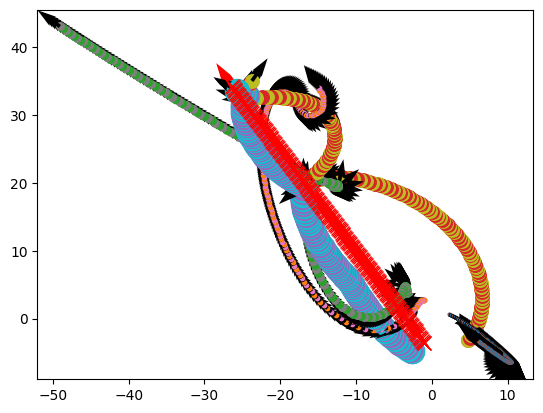

In [ ]:
M = ms.sum() #Total mass of the system

T = np.linspace(0,20,200) #time

fig = plt.figure()
camara = Camera(fig)


#Variables to save outcomes between iterations
pandas_PCMx = np.zeros(len(T))
pandas_PCMy = np.zeros(len(T))
pandas_PCMz = np.zeros(len(T))

pandas_RCMx = np.zeros(len(T))
pandas_RCMy = np.zeros(len(T))
pandas_RCMz = np.zeros(len(T))

pandas_Lx = np.zeros(len(T))
pandas_Ly = np.zeros(len(T))
pandas_Lz = np.zeros(len(T))

pandas_E = np.zeros(len(T))

for contador,  t in enumerate(T):

  RCM = 0

  VCM = 0

  K = 0

  PCM = 0

  L = 0

  U = 0

  for i in range(N):

    """"
    Calculations to get Sigma sums for Position of Barycenter, Velocity of BC,
    Linear momentum  and Angular momentum. Also, we can take advantage of the
    cycle for, to calculate the kinetic energy

    """

    RCM += ms[i]*np.array(sim.particles[i].xyz)/M
    VCM += ms[i]*np.array(sim.particles[i].vxyz)/M
    PCM += ms[i]*np.array(sim.particles[i].vxyz)
    L += ms[i]*np.cross(np.array(sim.particles[i].xyz),np.array(sim.particles[i].vxyz))
    K += (1/2)*ms[i]*np.dot(np.array(sim.particles[i].vxyz),np.array(sim.particles[i].vxyz))



  #Add outcomes to the storage variables

  pandas_RCMx[contador] = RCM[0]
  pandas_RCMy[contador] = RCM[1]
  pandas_RCMz[contador] = RCM[2]

  pandas_Lx[contador] = L[0]
  pandas_Ly[contador] = L[1]
  pandas_Lz[contador] = L[2]

  pandas_PCMx[contador] = PCM[0]
  pandas_PCMy[contador] = PCM[1]
  pandas_PCMz[contador] = PCM[2]

  Lp = 0


  #Other way to calculate Angular momentum
  for i in range(N):
    rip = np.array(sim.particles[i].xyz) - RCM
    vip = np.array(sim.particles[i].vxyz) - VCM
    Lp += ms[i]*np.cross(rip,vip)

  LCM = M*np.cross(RCM,VCM)

  """
  Calculation of Potential energy. Remember not calculate double Sigma for a
  same index.

  """

  for a in range(N):
      for b in range(N):

        if a == b:

          pass

        else:

          U += ((-1/2)*G*ms[a]*ms[b])/(np.linalg.norm(np.array(sim.particles[a].xyz)-np.array(sim.particles[b].xyz)))

  #Mechanical energy
  E = K + U

  pandas_E[contador] = E

  #Plotting

  plt.plot(RCM[0],RCM[1],'rx',ms=10)
  plt.quiver(RCM[0],RCM[1],VCM[0],VCM[1],color='r')

  for i in range(N):

    plt.scatter(sim.particles[i].x,sim.particles[i].y,s=3*ms[i])

    plt.quiver(sim.particles[i].x,sim.particles[i].y,sim.particles[i].vx,sim.particles[i].vy)

  camara.snap()


  #Update sim.particles to the next instant of time

  sim.integrate(t)


#Final check to check if everything went well

L , Lp + LCM

---

##*Let's create an animation*

___

In [ ]:
animacion = camara.animate()
HTML(animacion.to_jshtml())

##*Results Table:*

In [ ]:
import pandas as pd
import numpy as np

# Define the column names (climate variables)
column_names = ['PCM_x', 'PCM_y', 'PCM_z', 'RCM_x', 'RCM_y',
                'RCM_z', 'L_x', 'L_y', 'L_z', 'E']

# Create a DataFrame with random data

# Create the DataFrame
df = pd.DataFrame( columns=column_names)

df["PCM_x"] = pandas_PCMx
df["PCM_y"] = pandas_PCMy
df["PCM_z"] = pandas_PCMz

df["RCM_x"] = pandas_RCMx
df["RCM_y"] = pandas_RCMy
df["RCM_z"] = pandas_RCMz

df["L_x"] = pandas_Lx
df["L_y"] = pandas_Ly
df["L_z"] = pandas_Lz

df["E"] = pandas_E

# Display the DataFrame
df

PCM_x       PCM_y       PCM_z      RCM_x      RCM_y      RCM_z  \
0   -186.293214  277.355102 -244.036681  -0.992892  -3.607799   4.369949   
1   -186.293214  277.355102 -244.036681  -0.992892  -3.607799   4.369949   
2   -186.293214  277.355102 -244.036681  -1.121321  -3.416594   4.201713   
3   -186.293214  277.355102 -244.036681  -1.249749  -3.225388   4.033477   
4   -186.293214  277.355102 -244.036681  -1.378177  -3.034183   3.865241   
..          ...         ...         ...        ...        ...        ...   
195 -186.293214  277.355102 -244.036681 -25.907995  33.486042 -28.267841   
196 -186.293214  277.355102 -244.036681 -26.036423  33.677247 -28.436078   
197 -186.293214  277.355102 -244.036681 -26.164852  33.868452 -28.604314   
198 -186.293214  277.355102 -244.036681 -26.293280  34.059658 -28.772550   
199 -186.293214  277.355102 -244.036681 -26.421708  34.250863 -28.940786   

            L_x          L_y         L_z            E  
0   -175.818964 -1219.322224 -995.447178   906.078180  
1   -175.818964 -1219.322224 -995.447178   906.078180  
2   -175.818964 -1219.322224 -995.447178   882.688379  
3   -175.818964 -1219.322224 -995.447178   862.898231  
4   -175.818964 -1219.322224 -995.447178   846.020219  
..          ...          ...         ...          ...  
195 -175.818964 -1219.322224 -995.447178  1846.357415  
196 -175.818964 -1219.322224 -995.447178  1472.579396  
197 -175.818964 -1219.322224 -995.447178  1268.332543  
198 -175.818964 -1219.322224 -995.447178  1138.915553  
199 -175.818964 -1219.322224 -995.447178  1049.063360  

[200 rows x 10 columns]

##*Something weird is happening, all quadratures are Constants except the mechanical energy. However, the variations are tiny almost in all the domain*

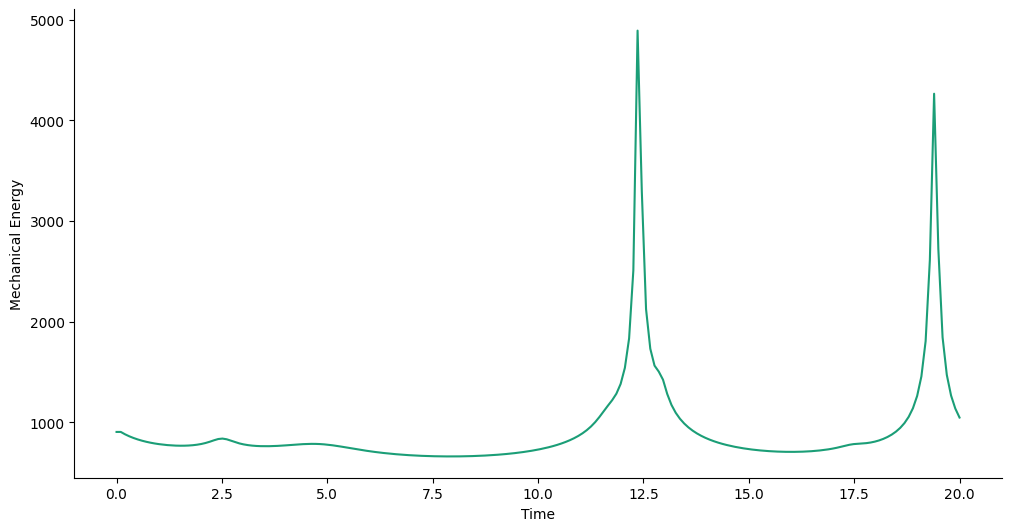

In [ ]:
# @title Energy vs Time
''
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = T
  ys = series['E']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('RCM_y', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('Mechanical Energy')

##*There are some peaks in some specifics moments, when bodies are closer this behavior increase!*

___

##Attempt to 3D plot (Animations did not go well)

###*Look for the  generate file planet.gif*
___

<Figure size 640x480 with 0 Axes>

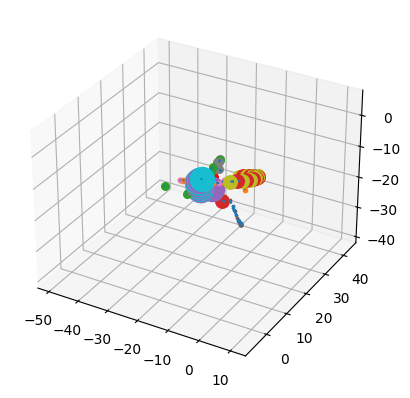

In [ ]:
M = ms.sum()
RCM = 0
VCM = 0
L = 0
T = np.linspace(0,11,20) #time

fig = plt.figure()

ax = plt.figure().add_subplot(projection='3d')

camara = Camera(fig)




for t in T:

  RCM = 0

  VCM = 0

  for i in range(N):
    RCM += ms[i]*np.array(sim.particles[i].xyz)/M
    VCM += ms[i]*np.array(sim.particles[i].vxyz)/M
    L += ms[i]*np.cross(np.array(sim.particles[i].xyz),np.array(sim.particles[i].vxyz))

  Lp = 0
  for i in range(N):
    rip = np.array(sim.particles[i].xyz) - RCM
    vip = np.array(sim.particles[i].vxyz) - VCM
    Lp += ms[i]*np.cross(rip,vip)

  LCM = M*np.cross(RCM,VCM)

  ax.plot(RCM[0],RCM[1],RCM[2],'rx',ms=10)
  ax.quiver(RCM[0],RCM[1], RCM[2],VCM[0],VCM[1],VCM[2],color='r')

  for i in range(N):

    ax.scatter(sim.particles[i].x,sim.particles[i].y,sim.particles[i].z ,s=3*ms[i])

    ax.quiver(sim.particles[i].x,sim.particles[i].y,sim.particles[i].z,
               sim.particles[i].vx,sim.particles[i].vy,sim.particles[i].vz,normalize=True)

  plt.savefig("{}.png".format(t))

  sim.integrate(t)

from PIL import Image

images = [Image.open("{}.png".format(n)) for n in T]

images[0].save('planet.gif', save_all=True, append_images=images[0:], duration=100, loop=0)